In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [25]:
df = pd.read_csv('Mobiles.csv')
print(df.head())

   product_id       product_name category     price  brand model  ram storage  \
0           1          iPhone 13   mobile  338287.6  Apple   D51  4GB    64GB   
1           2     iPhone 13 Mini   mobile  310000.0  Apple   D52  4GB    64GB   
2           3      iPhone 13 Pro   mobile  450000.0  Apple   D53  6GB   128GB   
3           4  iPhone 13 Pro Max   mobile  500000.0  Apple   D54  6GB   128GB   
4           5          iPhone 14   mobile  360000.0  Apple   D61  4GB   128GB   

   battery                                        description  
0  4000mAh  Apple iPhone 13 with 4GB RAM, 64GB storage, an...  
1  2400mAh  Apple iPhone 13 Mini with 4GB RAM, 64GB storag...  
2  3000mAh  Apple iPhone 13 Pro with 6GB RAM, 128GB storag...  
3  3500mAh  Apple iPhone 13 Pro Max with 6GB RAM, 128GB st...  
4  3200mAh  Apple iPhone 14 with 4GB RAM, 128GB storage, a...  


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    150 non-null    int64  
 1   product_name  150 non-null    object 
 2   category      150 non-null    object 
 3   price         150 non-null    float64
 4   brand         150 non-null    object 
 5   model         150 non-null    object 
 6   ram           150 non-null    object 
 7   storage       150 non-null    object 
 8   battery       150 non-null    object 
 9   description   150 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.8+ KB


In [27]:
print(df.isnull().sum())

product_id      0
product_name    0
category        0
price           0
brand           0
model           0
ram             0
storage         0
battery         0
description     0
dtype: int64


In [28]:
# Drop rows with missing values (or fill with a specific value)
df.dropna(inplace=True)  # or df.fillna(value, inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

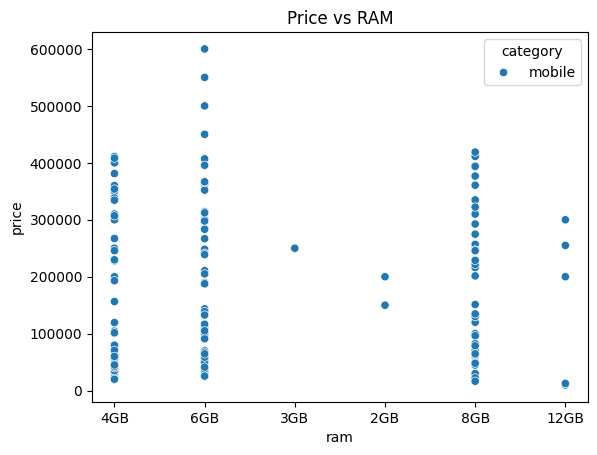

In [29]:
# Scatter plot to observe relationship between price and RAM
sns.scatterplot(data=df, x='ram', y='price', hue='category')
plt.title("Price vs RAM")
plt.show()


In [31]:
df['ram'] = df['ram'].str.replace('GB', '').astype(int)  # Convert '4GB' to 4
df['storage'] = df['storage'].str.replace('GB', '').astype(int)  # Convert '64GB' to 64
df['battery'] = df['battery'].str.replace('mAh', '').astype(int)  # Convert '4000mAh' to 4000


In [33]:
#Select features for clustering
features = df[['price', 'ram', 'storage', 'battery']]

In [40]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [41]:
kmeans = KMeans(n_clusters=5, random_state=42)  # You can choose the number of clusters
df['cluster'] = kmeans.fit_predict(scaled_features)

In [42]:
print(df[['product_name', 'category', 'cluster']])

          product_name category  cluster
0            iPhone 13   mobile        2
1       iPhone 13 Mini   mobile        2
2        iPhone 13 Pro   mobile        4
3    iPhone 13 Pro Max   mobile        4
4            iPhone 14   mobile        2
..                 ...      ...      ...
145         Galaxy S21   mobile        4
146          iPhone 13   mobile        1
147         Galaxy S21   mobile        1
148          OnePlus 9   mobile        1
149          OnePlus 9   mobile        0

[150 rows x 3 columns]


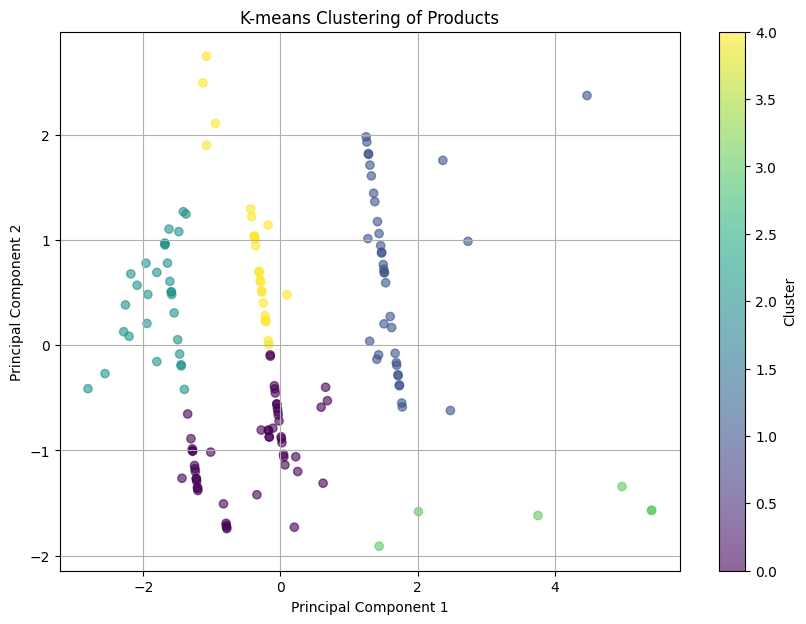

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Create a DataFrame with PCA results
df_pca = pd.DataFrame(data=features_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = df['cluster']

# Plot the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['cluster'], cmap='viridis', alpha=0.6)
plt.title('K-means Clustering of Products')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid()
plt.show()

In [44]:
df_laptops = pd.read_csv('laptops.csv')

In [45]:
features = df_laptops[['price', 'gpu', 'processor', 'size']]

# Define a preprocessing pipeline
numeric_features = ['price', 'size']
categorical_features = ['gpu', 'processor']


In [48]:
numeric_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder()

In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that first transforms the data, then applies KMeans
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=5, random_state=42))
])


In [50]:
pipeline.fit(features)

# Get cluster labels
df_laptops['cluster'] = pipeline.predict(features)

In [51]:
features_transformed = pipeline.named_steps['preprocessor'].transform(features)
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_transformed)

# Create a DataFrame with PCA results
df_pca_laptops = pd.DataFrame(data=features_pca, columns=['PCA1', 'PCA2'])
df_pca_laptops['cluster'] = df_laptops['cluster']

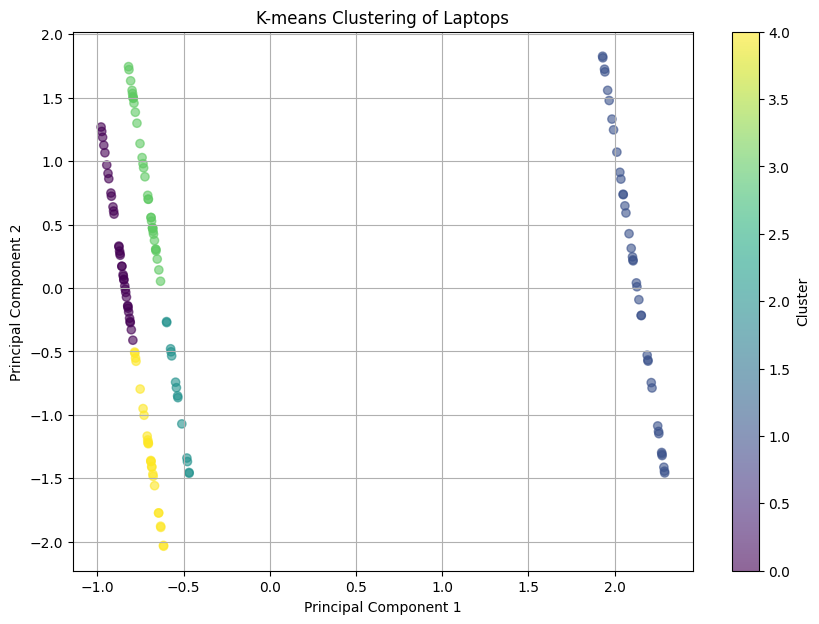

    product_name category  cluster
0        ZenBook   laptop        4
1       Pavilion   laptop        4
2       Inspiron   laptop        4
3        IdeaPad   laptop        1
4       Inspiron   laptop        2
..           ...      ...      ...
145       Aspire   laptop        4
146     Pavilion   laptop        0
147       Aspire   laptop        1
148     Inspiron   laptop        1
149     Pavilion   laptop        3

[150 rows x 3 columns]


In [52]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_pca_laptops['PCA1'], df_pca_laptops['PCA2'], c=df_pca_laptops['cluster'], cmap='viridis', alpha=0.6)
plt.title('K-means Clustering of Laptops')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid()
plt.show()

# Display the results
print(df_laptops[['product_name', 'category', 'cluster']])

C:\Users\ha159\AppData\Local\Temp\ipykernel_9484\2833184767.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['ram'] = features['ram'].apply(lambda x: 1 if x == 'True' else 0)
C:\Users\ha159\AppData\Local\Temp\ipykernel_9484\2833184767.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['storage'] = features['storage'].apply(lambda x: 1 if x == 'True' else 0)
C:\Users\ha159\AppData\Local\Temp\ipykernel_9484\2833184767.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy 

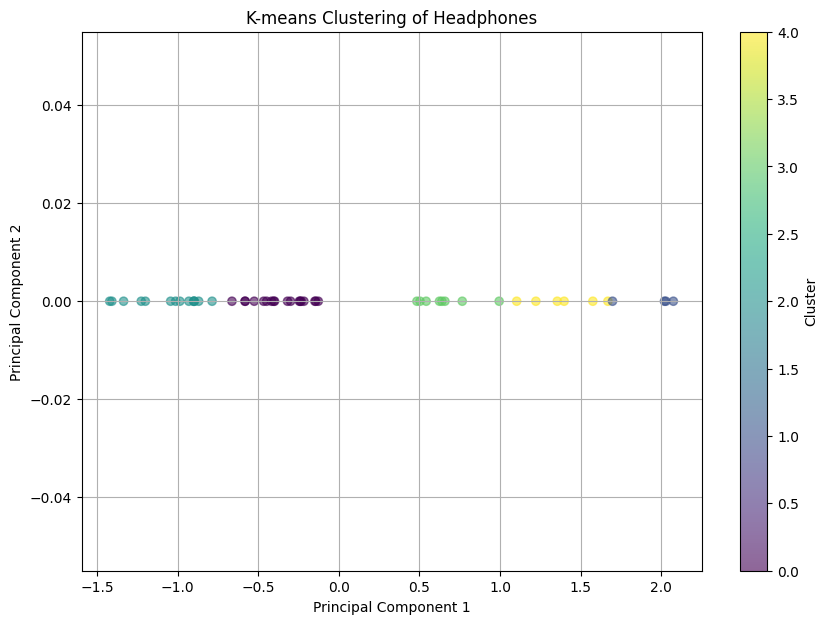

     product_name   category  cluster
0   Headphone 451  headphone        3
1   Headphone 452  headphone        2
2   Headphone 453  headphone        4
3   Headphone 454  headphone        2
4   Headphone 455  headphone        0
5   Headphone 456  headphone        2
6   Headphone 457  headphone        2
7   Headphone 458  headphone        0
8   Headphone 459  headphone        0
9   Headphone 460  headphone        0
10  Headphone 461  headphone        0
11  Headphone 462  headphone        0
12  Headphone 463  headphone        3
13  Headphone 464  headphone        2
14  Headphone 465  headphone        3
15  Headphone 466  headphone        2
16  Headphone 467  headphone        4
17  Headphone 468  headphone        2
18  Headphone 469  headphone        0
19  Headphone 470  headphone        0
20  Headphone 471  headphone        2
21  Headphone 472  headphone        2
22  Headphone 473  headphone        0
23  Headphone 474  headphone        0
24  Headphone 475  headphone        3
25  Headphon

In [53]:

# Load the headphones data
df_headphones = pd.read_csv('headphones.csv')

# Select features for clustering
features = df_headphones[['price', 'ram', 'storage', 'battery']]

# Since 'ram', 'storage', and 'battery' are boolean, we need to encode them as numeric
features['ram'] = features['ram'].apply(lambda x: 1 if x == 'True' else 0)
features['storage'] = features['storage'].apply(lambda x: 1 if x == 'True' else 0)
features['battery'] = features['battery'].apply(lambda x: 1 if x == 'True' else 0)

# Define a preprocessing pipeline
numeric_features = ['price', 'ram', 'storage', 'battery']

# Preprocessing for numeric data
numeric_transformer = StandardScaler()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create a pipeline that first transforms the data, then applies KMeans
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=5, random_state=42))
])

# Fit the pipeline to the data
pipeline.fit(features)

# Get cluster labels
df_headphones['cluster'] = pipeline.predict(features)

# Apply PCA to reduce dimensions for visualization
features_transformed = pipeline.named_steps['preprocessor'].transform(features)
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_transformed)

# Create a DataFrame with PCA results
df_pca_headphones = pd.DataFrame(data=features_pca, columns=['PCA1', 'PCA2'])
df_pca_headphones['cluster'] = df_headphones['cluster']

# Plot the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_pca_headphones['PCA1'], df_pca_headphones['PCA2'], c=df_pca_headphones['cluster'], cmap='viridis', alpha=0.6)
plt.title('K-means Clustering of Headphones')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid()
plt.show()

# Display the results
print(df_headphones[['product_name', 'category', 'cluster']])


C:\Users\ha159\AppData\Local\Temp\ipykernel_9484\1890885613.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['battery_life'] = features['battery_life'].str.replace(' hours', '').astype(int)
C:\Users\ha159\AppData\Local\Temp\ipykernel_9484\1890885613.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['water_resistance'] = features['water_resistance'].apply(lambda x: 1 if x == 'True' else 0)


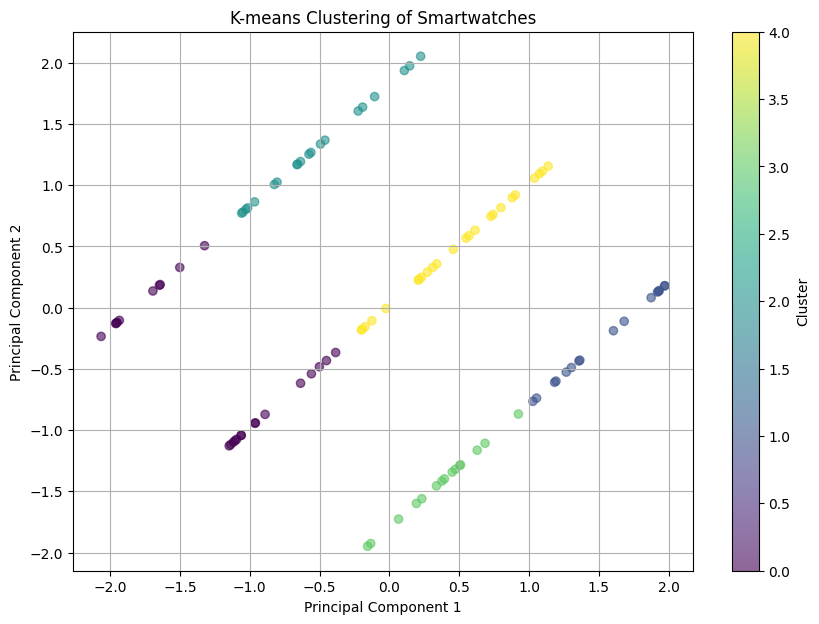

      product_name    category  cluster
0   Smartwatch 301  smartwatch        0
1   Smartwatch 302  smartwatch        0
2   Smartwatch 303  smartwatch        0
3   Smartwatch 304  smartwatch        3
4   Smartwatch 305  smartwatch        2
..             ...         ...      ...
95  Smartwatch 396  smartwatch        1
96  Smartwatch 397  smartwatch        0
97  Smartwatch 398  smartwatch        3
98  Smartwatch 399  smartwatch        0
99  Smartwatch 400  smartwatch        1

[100 rows x 3 columns]


In [54]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the smartwatches data
df_smartwatches = pd.read_csv('smartwatches.csv')

# Select relevant features for clustering
features = df_smartwatches[['price', 'battery_life', 'water_resistance']]

# Convert battery life to numeric (in hours)
features['battery_life'] = features['battery_life'].str.replace(' hours', '').astype(int)

# Convert water resistance to numeric (1 for True, 0 for False)
features['water_resistance'] = features['water_resistance'].apply(lambda x: 1 if x == 'True' else 0)

# Define a preprocessing pipeline
numeric_features = ['price', 'battery_life', 'water_resistance']

# Preprocessing for numeric data
numeric_transformer = StandardScaler()

# Create a pipeline that first transforms the data, then applies KMeans
pipeline = Pipeline(steps=[
    ('scaler', numeric_transformer),
    ('kmeans', KMeans(n_clusters=5, random_state=42))
])

# Fit the pipeline to the data
pipeline.fit(features)

# Get cluster labels
df_smartwatches['cluster'] = pipeline.predict(features)

# Apply PCA to reduce dimensions for visualization
features_transformed = pipeline.named_steps['scaler'].transform(features)
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_transformed)

# Create a DataFrame with PCA results
df_pca_smartwatches = pd.DataFrame(data=features_pca, columns=['PCA1', 'PCA2'])
df_pca_smartwatches['cluster'] = df_smartwatches['cluster']

# Plot the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_pca_smartwatches['PCA1'], df_pca_smartwatches['PCA2'], c=df_pca_smartwatches['cluster'], cmap='viridis', alpha=0.6)
plt.title('K-means Clustering of Smartwatches')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid()
plt.show()

# Display the results
print(df_smartwatches[['product_name', 'category', 'cluster']])


Adjusted Rand Index: 0.0
Normalized Mutual Information: 0.0


In [55]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load the earbuds data
earbuds = pd.read_csv('earbuds.csv')

# Select relevant features for clustering
features = earbuds[['price', 'sound_quality', 'noise-cancellation']].copy()

# Encode categorical variables
features['sound_quality'] = LabelEncoder().fit_transform(features['sound_quality'])
features['noise-cancellation'] = LabelEncoder().fit_transform(features['noise-cancellation'])

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(scaled_features)

# Add cluster labels to the original dataframe
earbuds['cluster'] = kmeans.labels_

# Display the results
print(earbuds[['product_name', 'price', 'sound_quality', 'noise-cancellation', 'cluster']])


   product_name     price sound_quality  noise-cancellation  cluster
0   Earbuds 401  310394.0            HD               False        1
1   Earbuds 402   65872.8        Stereo                True        0
2   Earbuds 403  273014.0        Stereo                True        2
3   Earbuds 404   70271.6        Stereo                True        0
4   Earbuds 405   30816.8        Stereo                True        0
5   Earbuds 406  251532.4        Stereo                True        2
6   Earbuds 407  329781.2        Stereo                True        2
7   Earbuds 408   74116.0        Stereo                True        0
8   Earbuds 409  393736.0        Stereo                True        2
9   Earbuds 410  264174.4        Stereo                True        2
10  Earbuds 411   86746.8        Stereo                True        0
11  Earbuds 412  139356.0            HD               False        1
12  Earbuds 413  356742.4        Stereo                True        2
13  Earbuds 414  232652.0        S

C:\Users\ha159\AppData\Local\Temp\ipykernel_9484\636601219.py:2: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


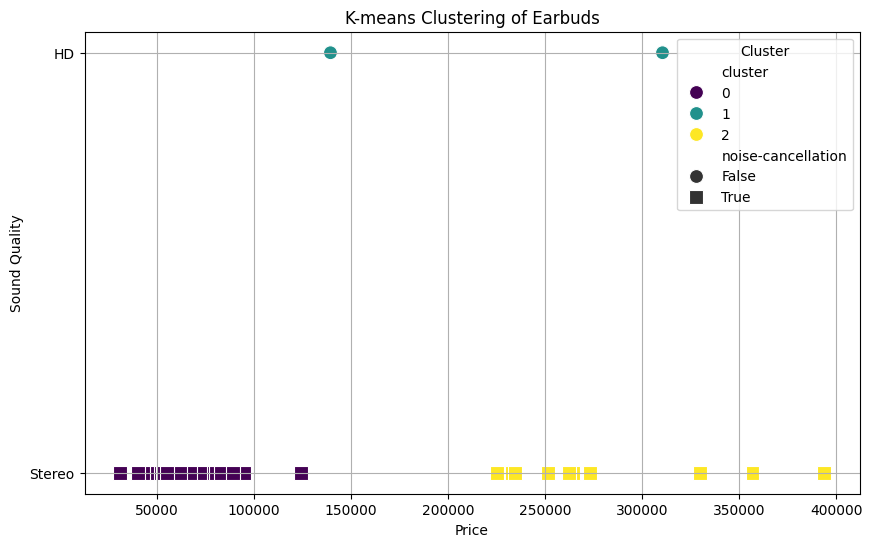

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='price', 
    y='sound_quality', 
    hue='cluster', 
    style='noise-cancellation', 
    data=earbuds, 
    palette='viridis', 
    markers=['o', 's', 'D'], 
    s=100
)
plt.title('K-means Clustering of Earbuds')
plt.xlabel('Price')
plt.ylabel('Sound Quality')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()